In [ ]:
import pandas as pd

file="Student_performance_data.csv"
data = pd.read_csv(file)

data.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [35]:
data_cleaned = data.drop(columns=["StudentID"])

# missing values check
missing_values = data_cleaned.isnull().sum()

missing_values


Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_cleaned.drop(columns=["GradeClass", "GPA"])
y = data_cleaned["GradeClass"]

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((1913, 12), (479, 12))

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy

0.7223382045929019

In [38]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Linear SVM
svm_model = SVC(kernel='linear', random_state=20)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)
print("Linear SVM Accuracy:", svm_accuracy)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)


Linear SVM Accuracy: 0.7453027139874739
KNN Accuracy: 0.5636743215031316


C:\Users\minejev\AppData\Local\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\minejev\AppData\Local\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\minejev\AppData\Local\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Creating and training the Logistic Regression model
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train_scaled, y_train)

# Prediction and evaluation
y_pred_lr = lr.predict(X_test_scaled)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# Saving the accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Creating and training the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Prediction and evaluation
y_pred_xgb = xgb.predict(X_test_scaled)
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Saving the accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Displaying the saved accuracy values
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


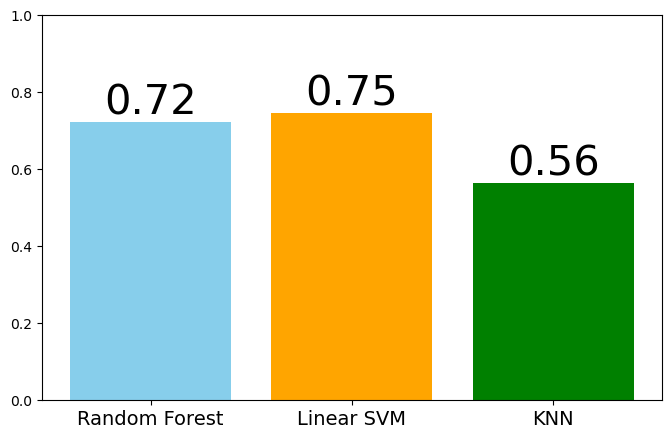

In [ ]:
import matplotlib.pyplot as plt

# Models and accuracies
models = ['Random Forest', 'Linear SVM', 'KNN', 'Logistic Regression', 'XGBoost']
accuracies = [accuracy, svm_accuracy, knn_accuracy, lr_accuracy, xgb_accuracy]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green', 'lightcoral', 'yellowgreen'])
plt.ylim(0, 1)

# Adding accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=14)

# Labels and displaying the plot
plt.xticks(fontsize=12)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracies', fontsize=16)
plt.show()


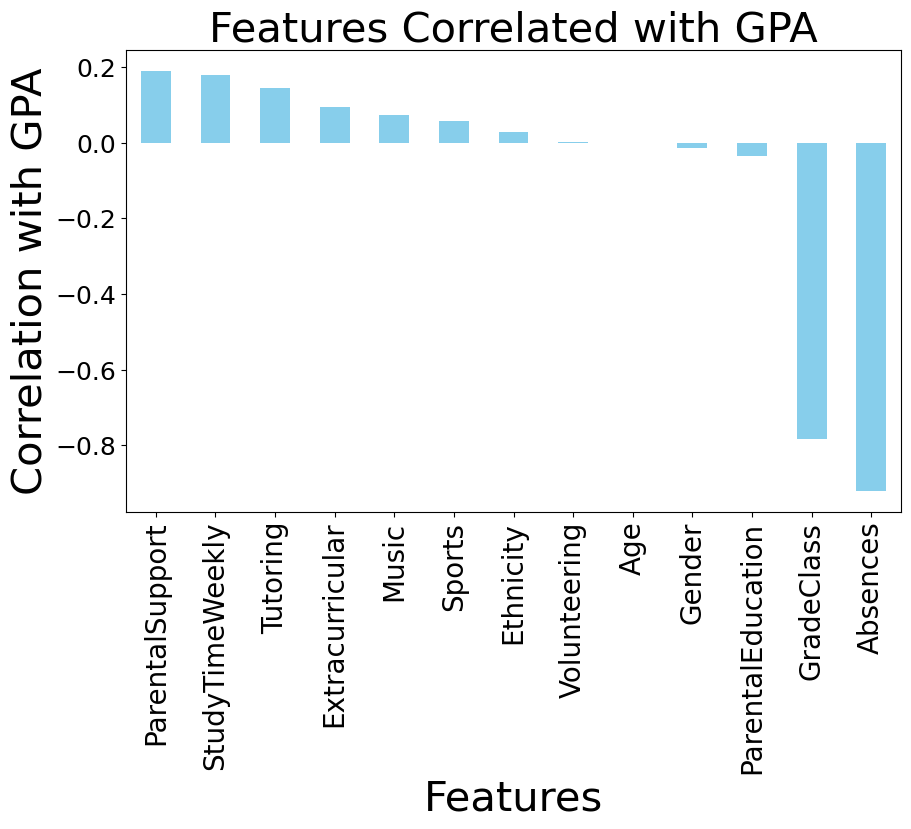

In [40]:
correlation_matrix = data_cleaned.corr()

gpa_corr = correlation_matrix['GPA'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
gpa_corr.drop('GPA').plot(kind='bar', color='skyblue', fontsize=18)
plt.xlabel('Features', fontsize=30)
plt.ylabel('Correlation with GPA', fontsize=30)
plt.title('Features Correlated with GPA', fontsize=30)
plt.xticks(fontsize=20)
plt.show()